# Import

In [1]:
import matplotlib.pyplot as plt 
import cv2 as cv 
import numpy as np 

# Inisiasi Gambar

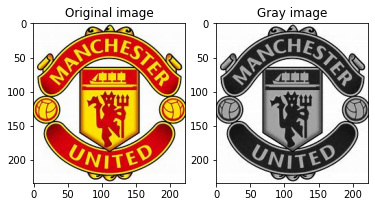

In [2]:
# Inisiasi Gambar
image = plt.imread("MU.jpeg")
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
height, width = gray.shape
hasil = np.zeros((height, width), dtype=np.uint8)

# Nampilin Gambar
plt.subplot(121)
plt.title("Original image")
plt.imshow(image)

plt.subplot(122)
plt.title("Gray image")
plt.imshow(gray, cmap="gray") 

# Inisiasi Kernel

In [3]:
kernelm_3 = np.full((3,3), 1/9) #Bluring sama aja tapi lebih kecil
kernelm_9 = np.full((9,9), 1/81) #Bluring sama aja tapi lebih besar
kernelsharp = np.array([[1/9, 1/9, 1/9], [1/9, 8/9, 1/9], [1/9, 1/9, 1/9]]) #Sharping
kernelsmooth = np.array([[1/10, 1/10, 1/10], [1/10, 1/5, 1/10], [1/10, 1/10, 1/10]]) #Smoothing

# Perbaikan Kualitas Citra

In [4]:
def Mean(image, kernel):
    # mengambil nilai shape dari variabel image dan kernel
    heightImage, widthImage = image.shape
    heightKernel, widthKernel = kernel.shape
    # melakukan perhitungan untuk mencari nilai tengah
    heigthCenter = int((heightKernel - 1)/2)
    widthCenter = int((widthKernel - 1)/2)

    # proses padding
    # padding mode yang digunakan adalah nearest
    # mode edge akan mengikutii nilai yang ada di pinggirnya
    leftPad = widthCenter
    rightPad = widthKernel - widthCenter
    topPad = heigthCenter
    botPad = heightKernel - heigthCenter
    image = np.pad(image, ((leftPad, rightPad), (topPad, botPad)), mode='edge')

    result = np.zeros([heightImage, widthImage])
    # proses konvolusi
    for i in range(heightImage):
         for j in range(widthImage):
             helper = 0
             for k in range(heightKernel):
                 for l in range(widthKernel):
                     helper += image[i+k, j+l] * kernel[k, l]
             result[i, j] = helper
    return result


Fungsi `Mean` yang diberikan mengimplementasikan perhitungan rata-rata (mean) dari suatu citra menggunakan konvolusi dengan kernel tertentu.

Berikut adalah langkah-langkah yang dilakukan oleh fungsi `Mean`:

1. Mengambil nilai shape (tinggi dan lebar) dari citra (`image`) dan kernel (`kernel`).
2. Menghitung nilai tengah (center) dari kernel dengan rumus `(heightKernel - 1)/2` untuk tinggi dan `(widthKernel - 1)/2` untuk lebar.
3. Melakukan proses padding pada citra menggunakan mode "edge" (menggunakan nilai pinggir citra untuk padding). Padding dilakukan dengan menambahkan nilai nol di sekitar citra sesuai dengan nilai tengah kernel.
4. Membuat array kosong (`result`) dengan ukuran yang sama dengan citra.
5. Melakukan proses konvolusi pada citra dengan kernel. Untuk setiap piksel pada citra, dilakukan perhitungan dengan mengalikan nilai piksel pada citra dengan nilai kernel yang sesuai, dan menjumlahkan hasilnya. Hasil perhitungan tersebut disimpan pada array `result`.
6. Mengembalikan array `result` yang berisi hasil perhitungan rata-rata citra.

Dengan menggunakan fungsi `Mean`, kita dapat menghitung rata-rata citra dengan menggunakan kernel konvolusi tertentu.

In [5]:
def med(arr):
    n = len(arr)
    sorted_arr = sorted(arr)
    if n % 2 == 0:
        median1 = sorted_arr[n//2]
        median2 = sorted_arr[n//2 - 1]
        median = (median1 + median2)/2
    else:
        median = sorted_arr[n//2]
        
    return median

def Median(image, kernel):
    # mengambil nilai shape dari variabel image dan kernel
    heightImage, widthImage = image.shape
    heightKernel, widthKernel = kernel.shape
    # melakukan perhitungan untuk mencari nilai tengah
    heigthCenter = int((heightKernel - 1)/2)
    widthCenter = int((widthKernel - 1)/2)

    # proses padding
    # padding mode yang digunakan adalah nearest
    # mode edge akan mengikutii nilai yang ada di pinggirnya
    leftPad = widthCenter
    rightPad = widthKernel - widthCenter
    topPad = heigthCenter
    botPad = heightKernel - heigthCenter
    image = np.pad(image, ((leftPad, rightPad), (topPad, botPad)), mode='edge')

    result = np.zeros([heightImage, widthImage])
    # proses konvolusi
    for i in range(heightImage):
         for j in range(widthImage):
             temp = np.zeros(len(kernel)*len(kernel))
             indeks = 0
             for k in range(heightKernel):
                 for l in range(widthKernel):
                     temp[indeks] += image[i+k,j+l]
                     indeks+=1
                     result[i,j] = med(temp)
             
    return result


Fungsi `Median` yang diberikan mengimplementasikan perhitungan titik tengah dari suatu citra menggunakan konvolusi dengan kernel tertentu.

Berikut adalah langkah-langkah yang dilakukan oleh fungsi `Median`:

1. Mengambil nilai shape (tinggi dan lebar) dari citra (`image`) dan kernel (`kernel`).
2. Menghitung nilai tengah (center) dari kernel dengan rumus `(heightKernel - 1)/2` untuk tinggi dan `(widthKernel - 1)/2` untuk lebar.
3. Melakukan proses padding pada citra menggunakan mode "edge" (menggunakan nilai pinggir citra untuk padding). Padding dilakukan dengan menambahkan nilai nol di sekitar citra sesuai dengan nilai tengah kernel.
4. Membuat array kosong (`result`) dengan ukuran yang sama dengan citra.
5. Melakukan proses konvolusi pada citra dengan kernel. Untuk setiap piksel pada citra, dilakukan perhitungan dengan mengalikan nilai piksel pada citra dengan nilai kernel yang sesuai, dan menjumlahkan hasilnya. Hasil perhitungan tersebut disimpan pada array `result`.
6. Mengembalikan array `result` yang berisi hasil perhitungan rata-rata citra.

Dengan menggunakan fungsi `Median`, kita dapat menghitung titik tengah citra dengan menggunakan kernel konvolusi tertentu.

In [6]:
def mod(arr):
    count = {}
    for num in arr:
        if num in count:
            count[num] += 1
        else:
            count[num] = 1

    max_count = 0
    modus = None
    for num in count:
        if count[num] > max_count:
            max_count = count[num]
            modus = num
    return modus

def Modus(image, kernel):
    # mengambil nilai shape dari variabel image dan kernel
    heightImage, widthImage = image.shape
    heightKernel, widthKernel = kernel.shape
    # melakukan perhitungan untuk mencari nilai tengah
    heigthCenter = int((heightKernel - 1)/2)# 3-1/2 = 1
    widthCenter = int((widthKernel - 1)/2)# 3-1/2 = 1

    # proses padding
    # padding mode yang digunakan adalah nearest
    # mode edge akan mengikutii nilai yang ada di pinggirnya
    leftPad = widthCenter# 1
    rightPad = widthKernel - widthCenter# 3-1 = 2
    topPad = heigthCenter# 1
    botPad = heightKernel - heigthCenter# 3-1 = 2
    image = np.pad(image, ((leftPad, rightPad), (topPad, botPad)), mode='edge')

    result = np.zeros([heightImage, widthImage])
    # proses konvolusi
    for i in range(heightImage):
         for j in range(widthImage):
             temp = np.zeros(len(kernel)*len(kernel))
             indeks = 0
             for k in range(heightKernel):
                 for l in range(widthKernel):
                     temp[indeks] += image[i+k,j+l]
                     indeks+=1
                     result[i,j] = mod(temp)
             
    return result

Fungsi `Modus` yang diberikan mengimplementasikan perhitungan titik terbanyak dari suatu citra menggunakan konvolusi dengan kernel tertentu.

Berikut adalah langkah-langkah yang dilakukan oleh fungsi `Modus`:

1. Mengambil nilai shape (tinggi dan lebar) dari citra (`image`) dan kernel (`kernel`).
2. Menghitung nilai tengah (center) dari kernel dengan rumus `(heightKernel - 1)/2` untuk tinggi dan `(widthKernel - 1)/2` untuk lebar.
3. Melakukan proses padding pada citra menggunakan mode "edge" (menggunakan nilai pinggir citra untuk padding). Padding dilakukan dengan menambahkan nilai nol di sekitar citra sesuai dengan nilai tengah kernel.
4. Membuat array kosong (`result`) dengan ukuran yang sama dengan citra.
5. Melakukan proses konvolusi pada citra dengan kernel. Untuk setiap piksel pada citra, dilakukan perhitungan dengan mengalikan nilai piksel pada citra dengan nilai kernel yang sesuai, dan menjumlahkan hasilnya. Hasil perhitungan tersebut disimpan pada array `result`.
6. Mengembalikan array `result` yang berisi hasil perhitungan rata-rata citra.

Dengan menggunakan fungsi `Modus`, kita dapat menghitung titik terbanyak citra dengan menggunakan kernel konvolusi tertentu.

# Ngitung

In [7]:
sharp=Mean(gray,kernelsharp)
smooth=Mean(gray,kernelsmooth)
mean3=Mean(gray,kernelm_3)
mean9=Mean(gray,kernelm_9)
median3=Median(gray,kernelm_3)
median9=Median(gray,kernelm_9)
modus3=Modus(gray,kernelm_3)
modus9=Modus(gray,kernelm_9)

# Display

In [ ]:
plt.figure(figsize=(15,6))

plt.subplot(2,4,1)
plt.imshow(mean3, cmap='gray')
plt.title("Mean 3x3")
plt.axis('off')
plt.subplot(2,4,2)
plt.imshow(mean9, cmap='gray')
plt.title("Mean 9x9")
plt.axis('off')

plt.subplot(2,4,3)
plt.imshow(sharp, cmap='gray')
plt.title("Sharpening")
plt.axis('off')
plt.subplot(2,4,4)
plt.imshow(smooth, cmap='gray')
plt.title("Smoothing")
plt.axis('off')

plt.subplot(2,4,5)
plt.imshow(modus3, cmap='gray')
plt.title("Modus 3x3")
plt.axis('off')
plt.subplot(2,4,6)
plt.imshow(modus9, cmap='gray')
plt.title("Modus 9x9")
plt.axis('off')

plt.subplot(2,4,7)
plt.imshow(median3, cmap='gray')
plt.title("Median 3x3")
plt.axis('off')
plt.subplot(2,4,8)
plt.imshow(median9, cmap='gray')
plt.title("Median 9x9")
plt.axis('off')

# Deteksi Tepi

In [ ]:
def padding (img, kernel):
    if len(kernel)%2 == 0:
        n = int(len(kernel)/2)
        result = np.pad (img, ([0,n],[0,n]))
    else:
        n = int((len(kernel)-1)/2)
        result = np.pad (img, ([n,n],[n,n]))
    return result

Padding dilakukan sebelum konvolusi untuk memastikan bahwa ukuran output dari konvolusi memiliki dimensi yang sama dengan input. Ketika melakukan konvolusi, kernel akan bergerak di sepanjang gambar dengan langkah tertentu. Jika tidak dilakukan padding, maka bagian pinggir gambar tidak akan tercakup sepenuhnya oleh kernel, sehingga akan menghasilkan output yang lebih kecil dari input.

Dengan melakukan padding, kita menambahkan piksel-piksel tambahan di sekitar gambar sehingga kernel dapat bergerak secara penuh di sepanjang gambar. Hal ini memastikan bahwa output dari konvolusi memiliki dimensi yang sama dengan input, sehingga tidak terjadi perubahan ukuran gambar setelah dilakukan konvolusi.

In [ ]:
def konvolusi(pad, img, kernel):
    result = np.zeros(img.shape).astype(int)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            
            for k in range(len(kernel)):
                for l in range(len(kernel)):
                    result[i,j] += pad[i+k,j+l] * kernel[k][l]
    return result

Dalam kode yang diberikan, terdapat fungsi `konvolusi` yang digunakan untuk melakukan operasi konvolusi pada gambar. Mari kita bahas langkah demi langkah.

1. Fungsi `konvolusi` memiliki tiga parameter: `pad`, `img`, dan `kernel`. Parameter `pad` adalah gambar yang telah dipad dengan nilai nol di sekitarnya, `img` adalah gambar asli, dan `kernel` adalah matriks kernel yang digunakan untuk operasi konvolusi.

2. Variabel `result` diinisialisasi sebagai matriks nol dengan ukuran yang sama dengan gambar asli (`img`). Variabel ini akan menyimpan hasil dari operasi konvolusi.

3. Dalam loop `for` pertama, kita melakukan iterasi sepanjang dimensi vertikal gambar (`img.shape[0]`).

4. Dalam loop `for` kedua, kita melakukan iterasi sepanjang dimensi horizontal gambar (`img.shape[1]`).

5. Di dalam loop kedua, terdapat dua loop lagi (`for k in range(len(kernel))` dan `for l in range(len(kernel))`) yang digunakan untuk mengiterasi elemen-elemen dalam matriks kernel.

6. Pada setiap iterasi, kita mengalikan elemen gambar yang sesuai dengan elemen kernel, dan menambahkannya ke elemen yang sesuai dalam matriks `result`.

7. Setelah selesai melakukan operasi konvolusi pada seluruh elemen gambar, kita mengembalikan matriks `result` sebagai hasil dari fungsi `konvolusi`.

Fungsi ini menggunakan konsep konvolusi dalam pemrosesan citra untuk menghasilkan gambar yang telah diperhalus atau diperjelas berdasarkan matriks kernel yang diberikan.

In [ ]:
def Edge_Detection(image,kernel1,kernel2):
    pad_image = padding(image,kernel1)

    konv1 = konvolusi(pad_image,image,kernel1)
    konv2 = konvolusi(pad_image,image,kernel2)

    result = np.power(konv1,2) + np.power(konv2,2)
    result = np.sqrt(result)


    return result

Fungsi `Edge_Detection` dalam kode tersebut adalah untuk mendeteksi tepi (edge detection) pada gambar menggunakan dua kernel yang diberikan.

Pertama, fungsi ini melakukan padding pada gambar menggunakan fungsi `padding(image, kernel1)`. Padding adalah proses menambahkan piksel tambahan di sekitar gambar untuk memastikan bahwa tepi gambar juga terdeteksi dengan baik.

Selanjutnya, fungsi ini melakukan konvolusi pada gambar yang telah dipad menggunakan kernel pertama (`kernel1`) dan kernel kedua (`kernel2`). Konvolusi adalah operasi matematis yang menggabungkan dua set data, dalam hal ini gambar dan kernel, untuk menghasilkan gambar baru yang menyoroti fitur-fitur tertentu. Hasil konvolusi pertama disimpan dalam variabel `konv1`, sedangkan hasil konvolusi kedua disimpan dalam variabel `konv2`.

Setelah itu, fungsi ini menghitung hasil akhir dengan mengkuadratkan nilai `konv1` dan `konv2`, kemudian menjumlahkannya. Hasilnya kemudian diambil akar kuadratnya menggunakan fungsi `np.sqrt()`. Ini dilakukan untuk menggabungkan informasi dari kedua kernel dan menghasilkan gambar yang lebih jelas dalam mendeteksi tepi.

`Result = Akar(x^2 + y^2)`

Terakhir, hasil akhir dikembalikan sebagai output dari fungsi `Edge_Detection`.

Output yang dihasilkan akan menjadi gambar yang telah diproses untuk mendeteksi tepi.

# Inisiasi Kernel

In [ ]:
Sx = [[-1, 0, 1],
      [-2, 0, 2],
      [-1, 0, 1]]
Sy = [[ 1, 2, 1],
      [ 0, 0, 0],
      [-1,-2,-1]]
Px = [[-1, 0, 1],
      [-1, 0, 1],
      [-1, 0, 1]]
Py = [[ 1, 1, 1],
      [ 0, 0, 0],
      [-1,-1,-1]]
Rp = [[ 1, 0],
      [ 0,-1]]
Rm = [[ 0, 1],
      [-1, 0]]

# Ngitung

In [ ]:
sobel_mean3 = Edge_Detection(mean3, Sx, Sy)
sobel_mean9 = Edge_Detection(mean9, Sx, Sy)

prewitt_mean3 = Edge_Detection(mean3, Px, Py)
prewitt_mean9 = Edge_Detection(mean9, Px, Py)

roberts_mean3 = Edge_Detection(mean3, Rp, Rm)
roberts_mean9 = Edge_Detection(mean9, Rp, Rm)

In [ ]:
sobel_median3 = Edge_Detection(median3, Sx, Sy)
sobel_median9 = Edge_Detection(median9, Sx, Sy)

prewitt_median3 = Edge_Detection(median3, Px, Py)
prewitt_median9 = Edge_Detection(median9, Px, Py)

roberts_median3 = Edge_Detection(median3, Rp, Rm)
roberts_median9 = Edge_Detection(median9, Rp, Rm)

In [ ]:
sobel_modus3 = Edge_Detection(modus3, Sx, Sy)
sobel_modus9 = Edge_Detection(modus9, Sx, Sy)

prewitt_modus3 = Edge_Detection(modus3, Px, Py)
prewitt_modus9 = Edge_Detection(modus9, Px, Py)

roberts_modus3 = Edge_Detection(modus3, Rp, Rm)
roberts_modus9 = Edge_Detection(modus9, Rp, Rm)

In [ ]:
sobel_sharp = Edge_Detection(sharp, Sx, Sy)
sobel_smooth = Edge_Detection(smooth, Sx, Sy)

prewitt_sharp = Edge_Detection(sharp, Px, Py)
prewitt_smooth = Edge_Detection(smooth, Px, Py)

roberts_sharp = Edge_Detection(sharp, Rp, Rm)
roberts_smooth = Edge_Detection(smooth, Rp, Rm)

# Display

In [ ]:
plt.figure(figsize=(15,6))

plt.subplot(2,4,1)
plt.imshow(sobel_mean3, cmap='gray')
plt.title("Sobel Mean 3x3")
plt.axis('off')
plt.subplot(2,4,2)
plt.imshow(sobel_mean9, cmap='gray')
plt.title("Sobel Mean 9x9")
plt.axis('off')

plt.subplot(2,4,3)
plt.imshow(sobel_sharp, cmap='gray')
plt.title("Sobel Sharpening")
plt.axis('off')
plt.subplot(2,4,4)
plt.imshow(sobel_smooth, cmap='gray')
plt.title("Sobel Smoothing")
plt.axis('off')

plt.subplot(2,4,5)
plt.imshow(sobel_modus3, cmap='gray')
plt.title("Sobel Modus 3x3")
plt.axis('off')
plt.subplot(2,4,6)
plt.imshow(sobel_modus9, cmap='gray')
plt.title("Sobel Modus 9x9")
plt.axis('off')

plt.subplot(2,4,7)
plt.imshow(sobel_median3, cmap='gray')
plt.title("Sobel Median 3x3")
plt.axis('off')
plt.subplot(2,4,8)
plt.imshow(sobel_median9, cmap='gray')
plt.title("Sobel Median 9x9")
plt.axis('off')

In [ ]:
plt.figure(figsize=(15,6))

plt.subplot(2,4,1)
plt.imshow(prewitt_mean3, cmap='gray')
plt.title("Prewitt Mean 3x3")
plt.axis('off')
plt.subplot(2,4,2)
plt.imshow(prewitt_mean9, cmap='gray')
plt.title("Prewitt Mean 9x9")
plt.axis('off')

plt.subplot(2,4,3)
plt.imshow(prewitt_sharp, cmap='gray')
plt.title("Prewitt Sharpening")
plt.axis('off')
plt.subplot(2,4,4)
plt.imshow(prewitt_smooth, cmap='gray')
plt.title("Prewitt Smoothing")
plt.axis('off')

plt.subplot(2,4,5)
plt.imshow(prewitt_modus3, cmap='gray')
plt.title("Prewitt Modus 3x3")
plt.axis('off')
plt.subplot(2,4,6)
plt.imshow(prewitt_modus9, cmap='gray')
plt.title("Prewitt Modus 9x9")
plt.axis('off')

plt.subplot(2,4,7)
plt.imshow(prewitt_median3, cmap='gray')
plt.title("Prewitt Median 3x3")
plt.axis('off')
plt.subplot(2,4,8)
plt.imshow(prewitt_median9, cmap='gray')
plt.title("Prewitt Median 9x9")
plt.axis('off')

In [ ]:
plt.figure(figsize=(15,6))

plt.subplot(2,4,1)
plt.imshow(roberts_mean3, cmap='gray')
plt.title("Roberts Mean 3x3")
plt.axis('off')
plt.subplot(2,4,2)
plt.imshow(roberts_mean9, cmap='gray')
plt.title("Roberts Mean 9x9")
plt.axis('off')

plt.subplot(2,4,3)
plt.imshow(roberts_sharp, cmap='gray')
plt.title("Roberts Sharpening")
plt.axis('off')
plt.subplot(2,4,4)
plt.imshow(roberts_smooth, cmap='gray')
plt.title("Roberts Smoothing")
plt.axis('off')

plt.subplot(2,4,5)
plt.imshow(roberts_modus3, cmap='gray')
plt.title("Roberts Modus 3x3")
plt.axis('off')
plt.subplot(2,4,6)
plt.imshow(roberts_modus9, cmap='gray')
plt.title("Roberts Modus 9x9")
plt.axis('off')

plt.subplot(2,4,7)
plt.imshow(roberts_median3, cmap='gray')
plt.title("Roberts Median 3x3")
plt.axis('off')
plt.subplot(2,4,8)
plt.imshow(roberts_median9, cmap='gray')
plt.title("Roberts Median 9x9")
plt.axis('off')